In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

data = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')

In [38]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')


print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Data Exploration

Check for Missing Values

In [4]:

missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Series([], dtype: int64)


Basic Statistics

In [5]:

print("Statistics of numerical features:")
print(data.describe())


Statistics of numerical features:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+

# Data Types and Unique Values

In [6]:

print("Data types of each column:")
print(data.dtypes)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())


Data types of each column:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
Unique values in date:
['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120

In [19]:
print(data.columns)


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       ...
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object', length=107)


# Data Preprocessing
Date Feature Extraction


date column is in string format,

In [7]:

data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT000000')

# Extract year, month, and day
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data.drop(columns=['date'], inplace=True)


# Numerical Features

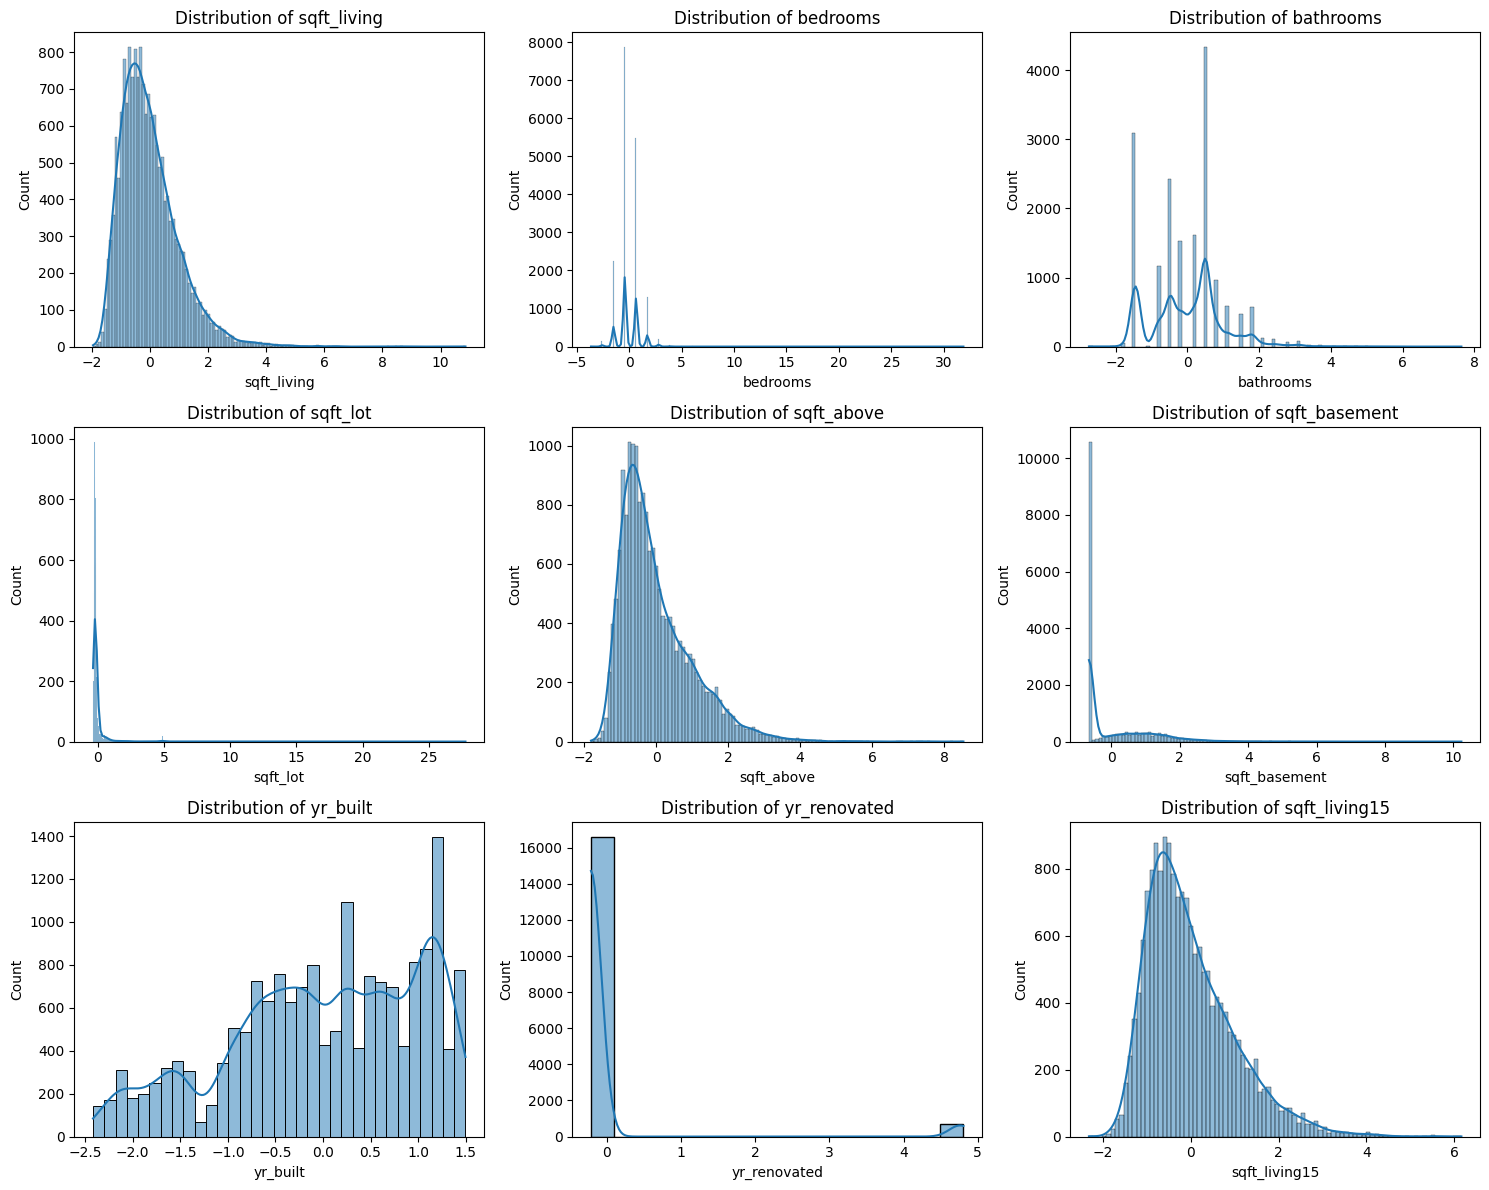

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above',
    'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15'
]

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


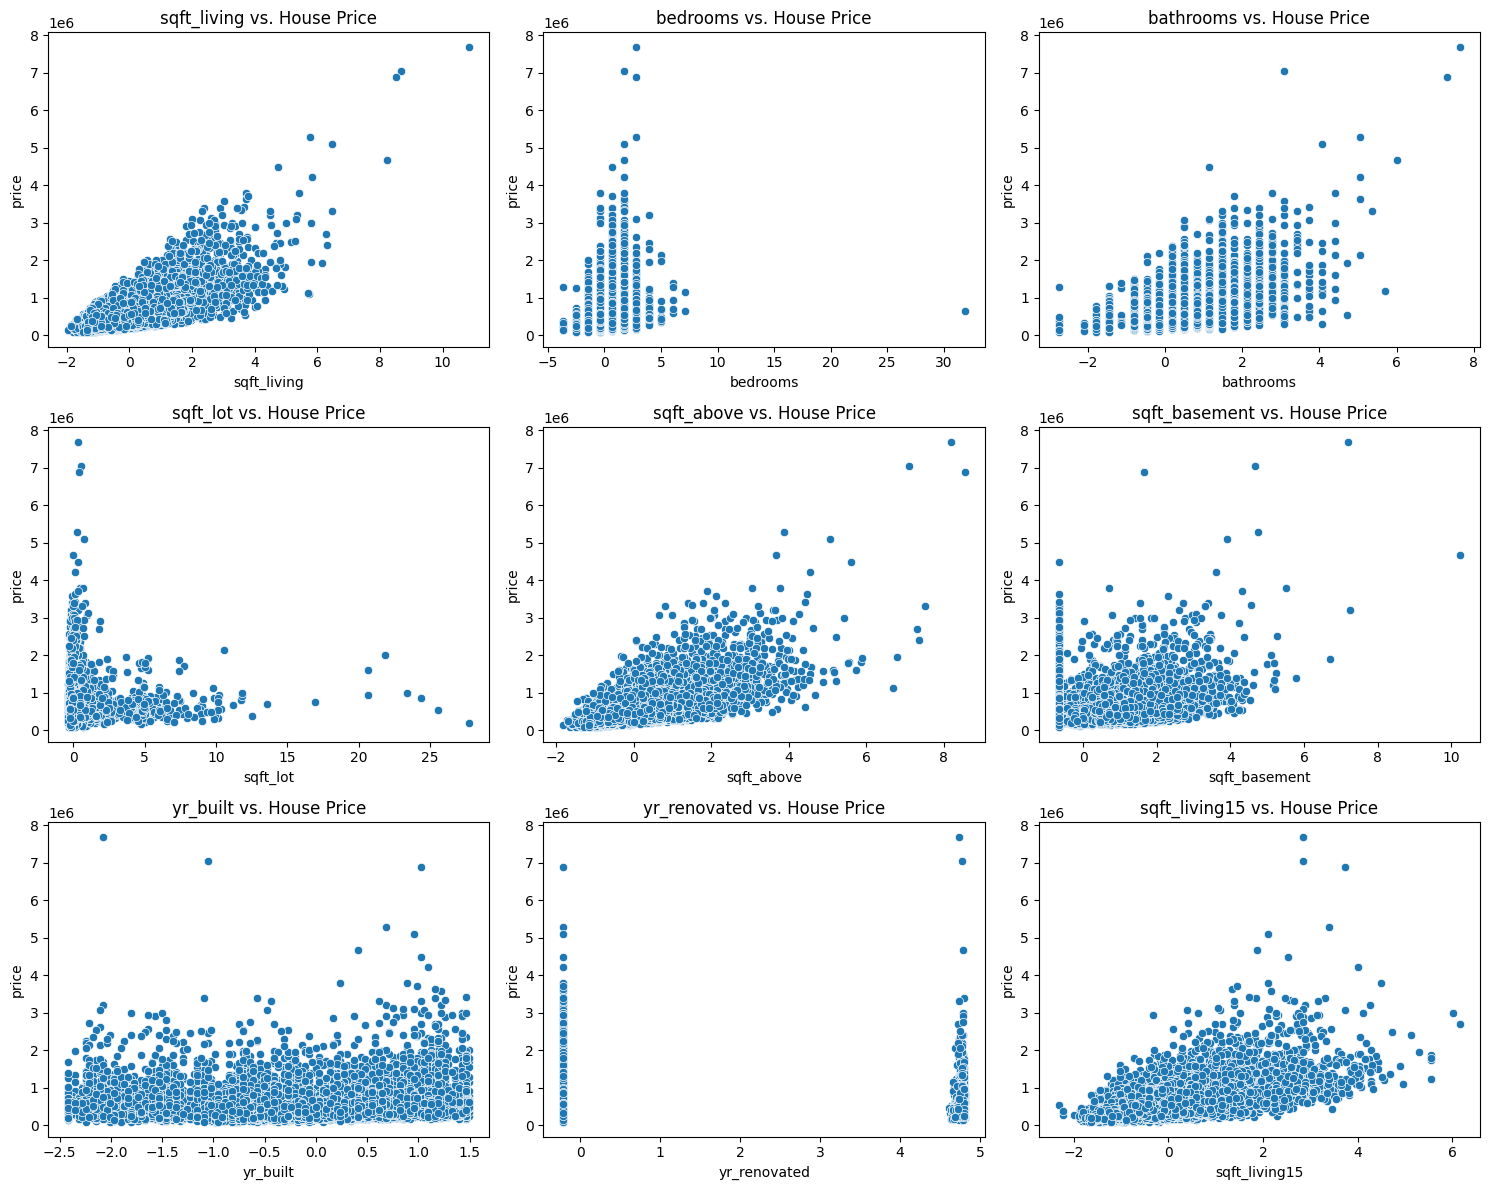

In [43]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.title(f'{feature} vs. House Price')
plt.tight_layout()
plt.show()


# Categorical Features

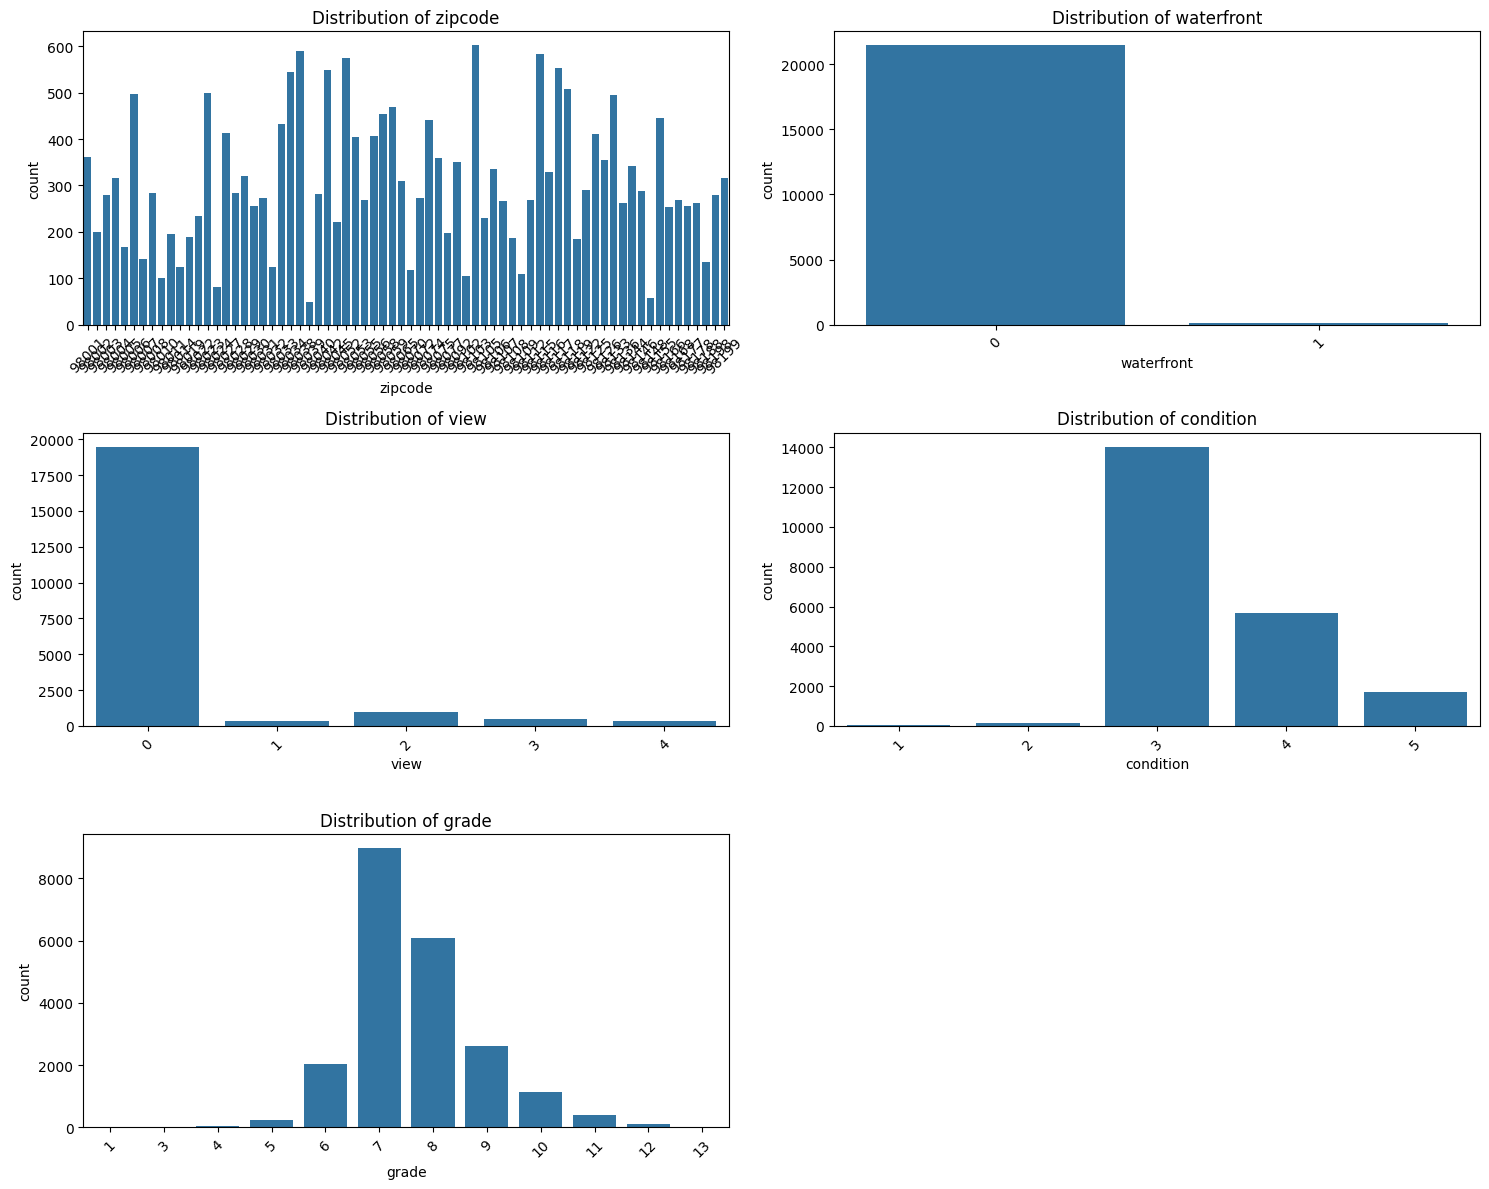

In [44]:
categorical_features = ['zipcode', 'waterfront', 'view', 'condition', 'grade']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


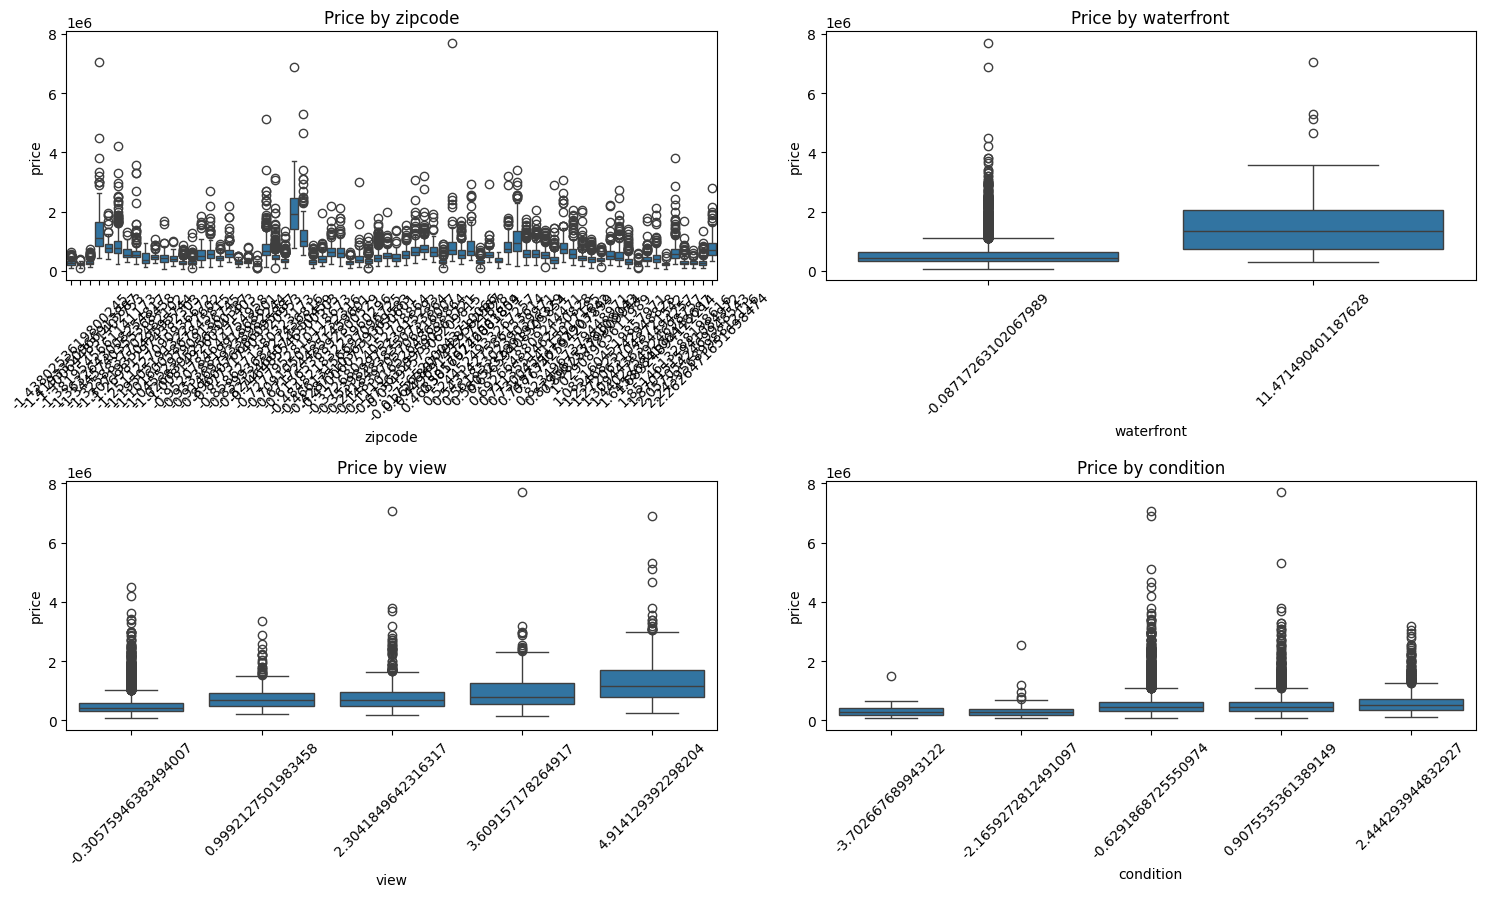

In [45]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features[:-1], 1):  # Excluding 'grade' for simplicity
    plt.subplot(3, 2, i)
    sns.boxplot(x=X_train[feature], y=y_train)
    plt.title(f'Price by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Interaction Effects

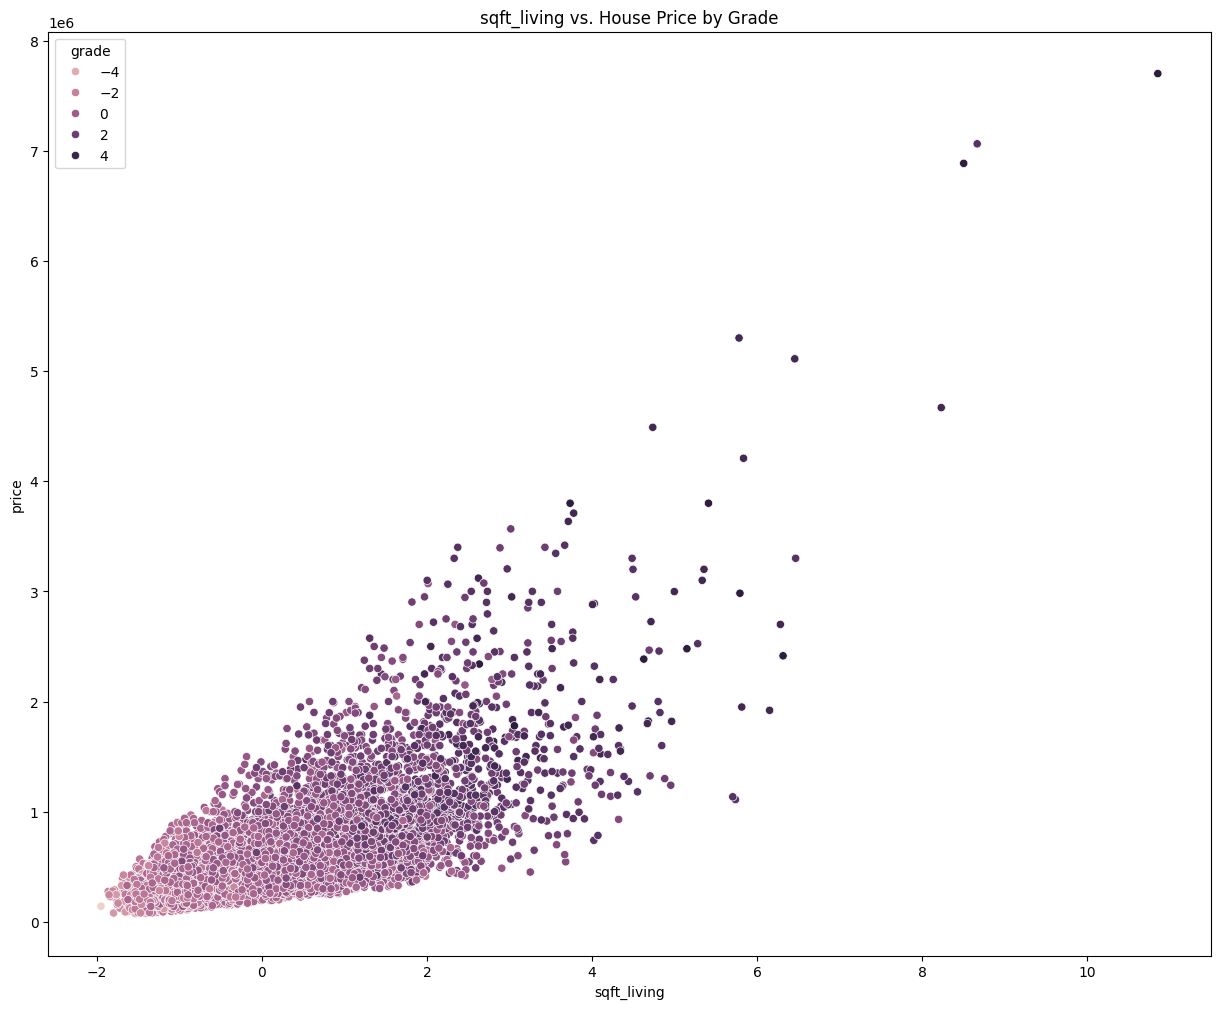

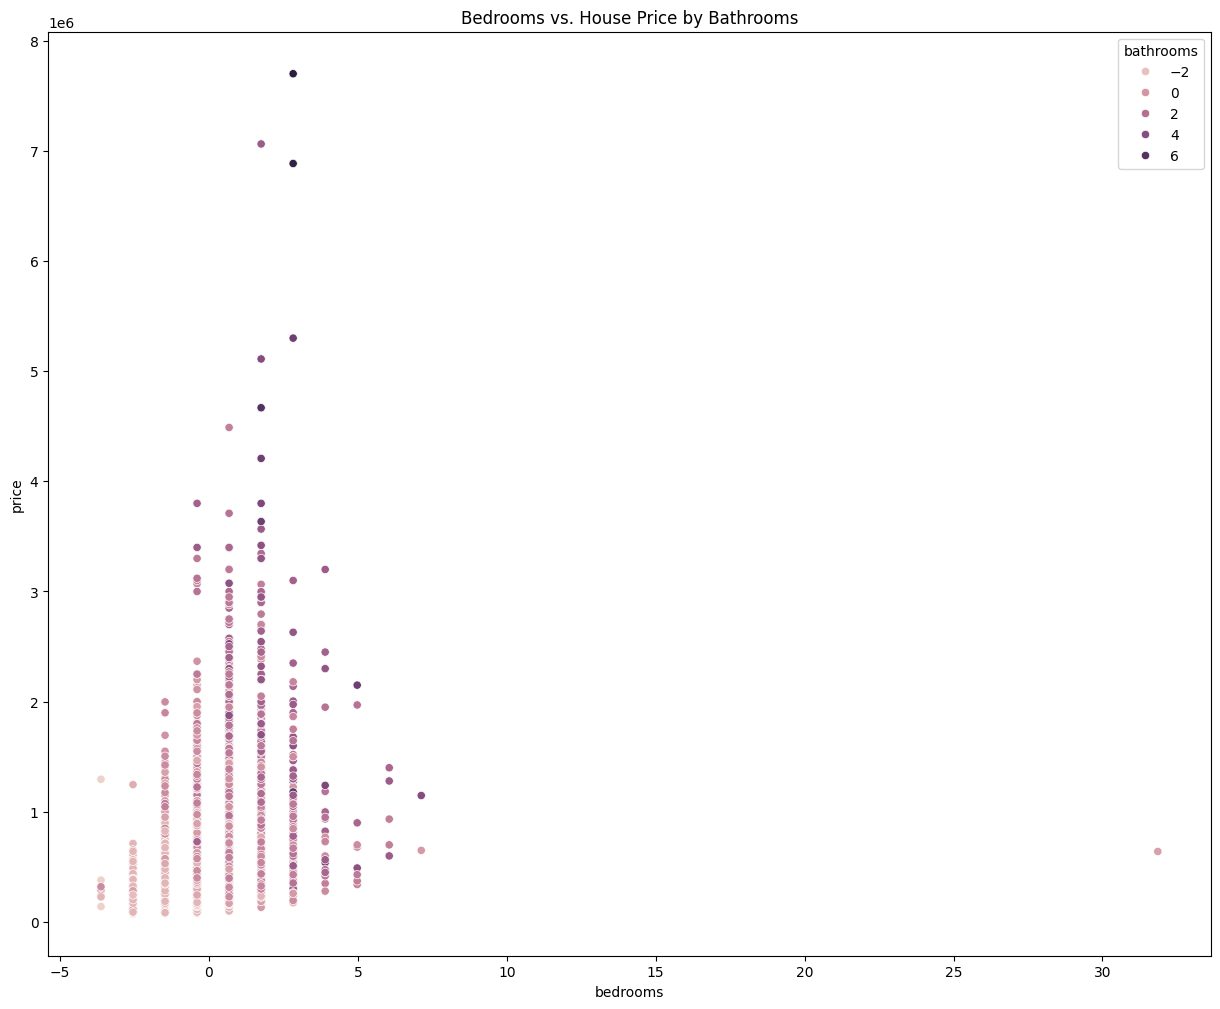

In [46]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x=X_train['sqft_living'], y=y_train, hue=X_train['grade'])
plt.title('sqft_living vs. House Price by Grade')
plt.show()

plt.figure(figsize=(15, 12))
sns.scatterplot(x=X_train['bedrooms'], y=y_train, hue=X_train['bathrooms'])
plt.title('Bedrooms vs. House Price by Bathrooms')
plt.show()


# Encode Categorical Variables

In [22]:

print("Columns in the reloaded data:")
print(data.columns)

missing_columns = ['zipcode', 'waterfront', 'view', 'condition']
present_columns = [col for col in missing_columns if col in data.columns]

if present_columns:
    print(f"Present columns: {present_columns}")
else:
    print(f"Missing columns: {missing_columns}")


Columns in the reloaded data:
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Present columns: ['zipcode', 'waterfront', 'view', 'condition']


In [23]:
from sklearn.preprocessing import OneHotEncoder


categorical_columns = ['zipcode', 'waterfront', 'view', 'condition']

existing_categorical_columns = [col for col in categorical_columns if col in data.columns]

if existing_categorical_columns:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_data = encoder.fit_transform(data[existing_categorical_columns])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(existing_categorical_columns))
    data = data.drop(existing_categorical_columns, axis=1).join(encoded_df)

print("Data after encoding categorical columns:")
print(data.head())


Data after encoding categorical columns:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  grade  sqft_above  ...  zipcode_98199  waterfront_1  \
0      5650     1.0      7        1180  ...            0.0           0.0   
1      7242     2.0      7        2170  ...            0.0           0.0   
2     10000     1.0      6         770  ...            0.0           0.0   
3      5000     1.0      7        1050  ...            0.0           0.0   
4      8080     1.0      8        1680  ...            0.0           0.0   

   view_1  view_2  view_3  view_4

In [30]:

categorical_columns = ['zipcode', 'waterfront', 'view', 'condition']
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('price')  #  'price' is the target variable
target_column = 'price'


X = data.drop(columns=[target_column])
y = data[target_column]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
            ('scaler', StandardScaler())  # Feature scaling
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))  # Encoding
        ]), categorical_columns)
    ]
)

X_processed = preprocessor.fit_transform(X)
num_feature_names = numerical_columns
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_columns)

columns = num_feature_names + list(cat_feature_names)


X_processed_df = pd.DataFrame(X_processed, columns=columns)

final_data = pd.concat([X_processed_df, y.reset_index(drop=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, random_state=42
)

print("Data preprocessing completed.")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Data preprocessing completed.
Training data shape: (17290, 97)
Test data shape: (4323, 97)


# Initialize and Train the Model

In [32]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Make Predictions

In [33]:

y_pred = model.predict(X_test)


# Evaluate the Model
Evaluate the model’s performance using metrics like Mean Squared Error (MSE) and R-squared (R²).

In [39]:

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 28835131426.95
Root Mean Squared Error (RMSE): 169809.10
Mean Absolute Error (MAE): 98450.62
R-squared (R²): 0.81


# Visualize Results

<ipython-input-40-1d85601437ba>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')


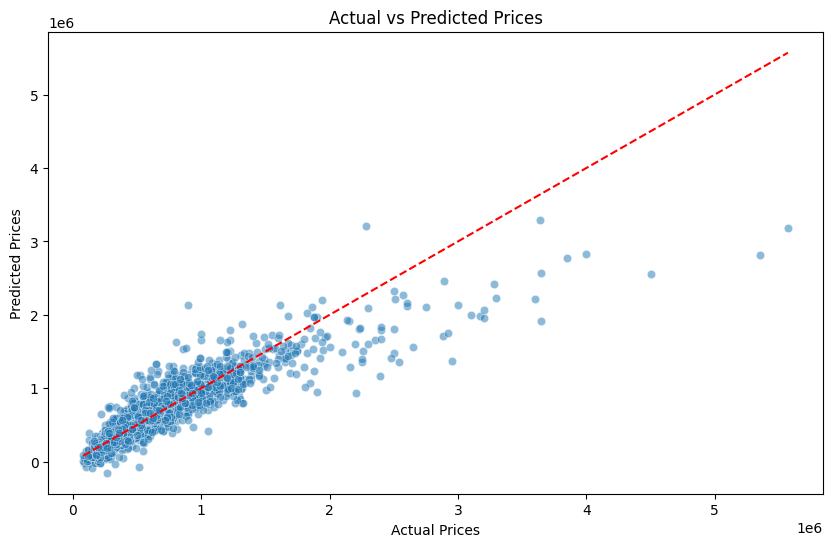

In [40]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')
plt.show()


In [41]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

The regression model achieved an R-squared value of 0.81, indicating that 81% of the variance in housing prices is explained by the model. The Mean Absolute Error (MAE) is $98,450.62, suggesting that on average, predictions deviate from actual values by this amount. The Root Mean Squared Error (RMSE) of $169,809.10 reflects the average magnitude of prediction errors in the same units as the target variable. While the model shows strong performance, with these metrics suggesting a good fit.